In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
np.random.seed(42)                      
from keras.models import Sequential             
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam, SGD

2024-05-06 12:04:29.936141: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 12:04:30.156796: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 12:04:30.156864: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 12:04:30.158071: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 12:04:30.258221: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 12:04:30.261359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [59]:
PATH_TO_DATA = '../../images/train_ocr/'
images = os.listdir(PATH_TO_DATA)

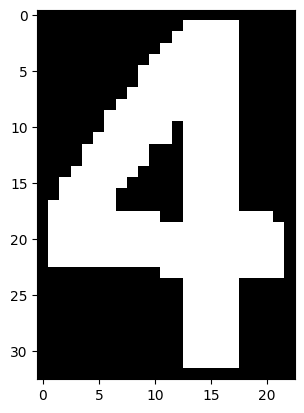

In [60]:
# Load images and labels into numpy arrays
X = []
y = []

for image in images:
    img = Image.open(PATH_TO_DATA + image)
    # convert to black and white
    img = img.convert('L')
    img = np.array(img) / 255
    # array to int
    img = img.astype(int)
    X.append(img)
    y.append(image[0])

X = np.array(X)
y = np.array(y)

X.shape, y.shape
plt.imshow(X[30], cmap='gray')

In [61]:
# Convert arrays to vectors
# X = X.reshape(X.shape[0], -1)
y = y.reshape(y.shape[0], -1)

X.shape, y.shape

((1002, 33, 23), (1002, 1))

In [62]:
# Convert labels to one-hot encoding
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y = lb.fit_transform(y)

y.shape

(1002, 27)

In [70]:
import joblib

joblib.dump(lb, 'label_binarizer.pkl')


['label_binarizer.pkl']

In [63]:
num_classes = y.shape[1]
num_pixels = X.shape[1]

num_classes, num_pixels

(27, 33)

In [64]:
def baseline_model():
    # create model
    model = Sequential()
    # Convolutional layer with rectified linear unit activation
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(33, 23, 1)))
    # Max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

    # Softmax layer
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    

    
    return model

# build the model
model = baseline_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 31, 21, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 10, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 8, 64)         18496     
                                                                 
 flatten_4 (Flatten)         (None, 6656)              0         
                                                                 
 dense_17 (Dense)            (None, 27)                179739    
                                                                 
Total params: 198555 (775.61 KB)
Trainable params: 198555 (775.61 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [65]:
opt = SGD(lr = 0.001)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

In [67]:
model.fit(X, y, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
32/32 [==============================] - 1s 33ms/step - loss: 0.2211 - accuracy: 0.9481
Epoch 2/10
32/32 [==============================] - 1s 26ms/step - loss: 0.1613 - accuracy: 0.9601
Epoch 3/10
32/32 [==============================] - 1s 26ms/step - loss: 0.3709 - accuracy: 0.9421
Epoch 4/10
32/32 [==============================] - 1s 27ms/step - loss: 0.1109 - accuracy: 0.9731
Epoch 5/10
32/32 [==============================] - 1s 31ms/step - loss: 0.0528 - accuracy: 0.9940
Epoch 6/10
32/32 [==============================] - 1s 30ms/step - loss: 0.0429 - accuracy: 0.9950
Epoch 7/10
32/32 [==============================] - 1s 28ms/step - loss: 0.0573 - accuracy: 0.9880
Epoch 8/10
32/32 [==============================] - 1s 30ms/step - loss: 0.0238 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 1s 28ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 1s 29ms/step - loss: 0.0175 - accuracy: 0.9990


# Test on LP

In [78]:
# model.save('ocr_model.h5')

predictions = [0.00092543,  8.6983e-09,  0.00029555,    0.018453,  7.9169e-06,  6.3804e-05,  3.1863e-07,  1.2928e-06,  2.9356e-06,  1.5965e-05,  0.00024953,   0.0010558,  1.5302e-10,  4.9721e-07,  1.2044e-05,     0.97877,   1.354e-09,  2.9288e-08,  0.00011888,  3.7258e-08,   1.523e-07,  7.3191e-07,    1.93e-08,   1.979e-05,  1.2073e-06,  4.7237e-07,
    6.455e-06]

predictions = np.array(predictions)

# transform the preidctions using the label binarizer
preds = lb.inverse_transform(predictions.reshape(1, -1))

print(preds)

['J']
